# 03 Evaluación numérica de la Respuesta
## 3.2 Métodos Basados en la Interpolación de la Exitación 
### Datos Iniciales  
>> <strong>Sistema</strong>  
    Rigidez -----------------------(k) [ton/cm]  
    Masa -------------------------(m) [ton]  
    Incremento de tiempo ------(s) [$\Delta t$]

>> <strong>Moviemiento Impuesto</strong>  
    Velocidad Inicial ----------($V_{0}$) [cm/seg]  
    Desplazamiento Inicial -----($U_{0}$) [cm]   

>> <strong>Amortiguamineto</strong>  
    Porcentaje de amortiguamiento ----------($\xi$) [%]  

>> <strong>Fuerza Impuesta</strong>  
    Fuerza aplicada al sistema ----------(F) [tonf] 
 
### Calculos

>><strong>Movimeinto</strong>   
Desplazamiento   
$u_{i+1} = Au_{i} + B \dot{u}_{i} +CP_{i} + DP_{i+1} $   

>>$A=e^{-\xi*w*\Delta t}\left[\cfrac{\xi}{\sqrt{1-\xi ^2}} \sin (w_{d} \Delta t) + \cos (w_{d} \Delta t)\right]$   

>>$B=e^{-\xi*w*\Delta t}\left[ \cfrac{1}{w_d} \sin (w_{d} \Delta t) \right]$   

>>$C= \cfrac{1}{k}  \left( \cfrac{2\xi}{w \Delta t} + e^{-\xi w \Delta t} \left[ \left( \cfrac{1-2 \xi ^2}{w_{d} \Delta t} - \cfrac{\xi}{\sqrt{1-\xi ^2}} \right) \sin (w_{d} \Delta t) - \left(2 + \cfrac{2 \xi}{w \Delta t} \right) \cos (w_d \Delta t) \right] \right)$    

>>$D= \cfrac{1}{k} \left[ 1- \cfrac{2\xi}{w \Delta t} + e^{-\xi w \Delta t} \left( \cfrac{2\xi ^2 -1}{w \Delta t} \sin (w_{d} \Delta t) + \cfrac{2\xi}{w \Delta t} + \right) \cos (w_d \Delta t) \right]$   

>>Velocidad   
$\dot{u}_{i+1} = A'u_{i} + B' \dot{u}_{i} +C'P_{i} + D'P_{i+1}$

>>$A'=e^{-\xi*w*\Delta t}\left[\cfrac{\xi}{\sqrt{1-\xi ^2}} \sin (w_{d} \Delta t) \right]$    

>>$B'=e^{-\xi*w*\Delta t}\left[ \cos (w_{d} \Delta t) - \cfrac{\xi}{\sqrt{1-\xi ^2}} \sin (w_{d} \Delta t) \right]$    

>>$C'= \cfrac{1}{k}  \left( - \cfrac{1}{\Delta t} + e^{-\xi w \Delta t} \left[ \left( \cfrac{w}{\sqrt{1-\xi ^2}} + \cfrac{\xi}{\Delta t \sqrt{1-\xi ^2}} \right) \sin (w_{d} \Delta t) + \cfrac{1}{\Delta t} \cos (w_d \Delta t) \right] \right)$  

>>$D' = \cfrac{1}{k\Delta t} \left[1 - e^{-\xi w \Delta t} \left( \cfrac{\xi}{\sqrt{1-\xi ^2}} \sin (w_{d} \Delta t) + \cos (w_{d} \Delta t)\right) \right]$

,ti(s),Pi,A*(ui),B*(vi),C*Pi,D*Pi+1,ui(cm),vi(cm/s)
0,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.01,0.5,0.000033,0.000098,0.000066,0.000033,0.000033,0.009846
2,0.02,1.0,0.000262,0.000391,0.000131,0.000066,0.000262,0.039262
3,0.03,1.5,0.000881,0.000877,0.000197,0.000099,0.000882,0.088010
4,0.04,2.0,0.002081,0.001552,0.000262,0.000131,0.002085,0.155778
...,...,...,...,...,...,...,...,...
196,1.96,0.0,-1.195845,0.032951,0.000000,0.000000,-1.198204,3.307614
197,1.97,0.0,-1.160604,0.037374,0.000000,0.000000,-1.162894,3.751636
198,1.98,0.0,-1.121018,0.041623,0.000000,0.000000,-1.123230,4.178117
199,1.99,0.0,-1.077270,0.045681,0.000000,0.000000,-1.079395,4.585490


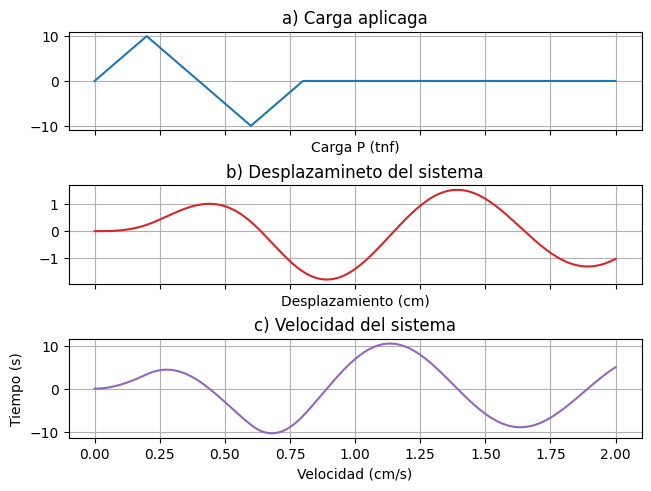

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#########################
### DATOS DEL SISTEMA ###
#########################

xi = 0.05                   #----------- Fracción de amortiguamiento
dt = 0.01                    #----------- Incremento del tiempo
t = np.arange(0,2+dt,dt)    #----------- Vector del tiempo
              
m = 0.2533                  #----------- Masa
k = 10                      #----------- Rigidez
T = 1                       #----------- Periodo
w = 2*np.pi / T             #----------- Frecuencia
wd = w * (1-xi**2)**(1/2)   #----------- Frecuencia amortiguada

#############################
### PARAMETROS DE TRABAJO ###
#############################

n = int(len(t))             #----------- Número de datos

u = np.zeros(n)             #----------- Declarar arreglo de Desplazamientos
v = np.zeros(n)             #----------- Declarar arreglo de Velocidades
P = np.zeros(n)             #----------- Declarar arreglo de Fuerzas

u[0] = 0                    #----------- Colocar en en arreglo Deplazamiento inicial
v[0] = 0                    #----------- Colocar en el arreglo Velocidad inicial

P[0:n] = 0                  #----------- Inicializa con ceros carga P
u[1:n] = 0                  #----------- Inicializa con ceros Desplazamientos apartir del segundo valor
v[1:n] = 0                  #----------- Inicializa con ceros Velocidades apartir del segundo valor

######################
### CARGA APLICADA ###
######################

for i in range(0, n-1 ,1):
    if t[i] <= 0.2:
        X1,Y1,X2,Y2 = 0, 0, 0.2, 10
        m = (Y2-Y1)/(X2-X1)
        x = t[i]-X1
        b = Y1
        P[i] = m*x + b
    elif t[i] <= 0.4:
        X1,Y1,X2,Y2 = 0.2, 10, 0.4, 0
        m = (Y2-Y1)/(X2-X1)
        x = t[i]-X1
        b = Y1
        P[i] = m*x + b
    elif t[i] <= 0.6:
        X1,Y1,X2,Y2 = 0.4, 0, 0.6, -10
        m = (Y2-Y1)/(X2-X1)
        x = t[i]-X1
        b = Y1
        P[i] = m*x + b
    elif t[i] <= 0.8:
        X1,Y1,X2,Y2 = 0.6, -10, 0.8, 0
        m = (Y2-Y1)/(X2-X1)
        x = t[i]-X1
        b = Y1
        P[i] = m*x + b
    else:
        P[i] = 0

#------- VARAIBLES -------#

A = np.exp(-xi*w*dt) * ((xi/((1-xi**2)**(1/2)))*np.sin(wd*dt)+np.cos(wd*dt))
B = np.exp(-xi*w*dt) * (np.sin(wd*dt)/wd)
C = ((2*xi/(w*dt))+np.exp(-xi*w*dt)*(((1-2*xi**2)/(wd*dt)-xi/((1-xi*w*dt)**(1/2)))*np.sin(wd*dt)-(1 + 2*xi/(w*dt)) *np.cos(wd*dt)))/k
D = (1 - 2 *xi/(w*dt) + np.exp(-xi*w*dt) *(((2*xi**2-1)/(wd*dt))*np.sin(wd*dt)+(2*xi/(w*dt))*np.cos(wd*dt)))/k

Ap = -np.exp(-xi*w*dt)*((w/((1-xi**2)**(1/2)))*np.sin(wd*dt))
Bp = np.exp(-xi*w*dt)*(np.cos(wd*dt)-(xi/((1-xi**2)**(1/2))*np.sin(wd*dt)))
Cp = (-1/dt + np.exp(-xi*w*dt)*((w/((1-xi**2)**(1/2))+xi/(dt*((1-xi**2)**(1/2))))* np.sin(wd*dt) + np.cos(wd*dt)/dt))/k
Dp = (1 - np.exp(-xi*w*dt)*((xi/((1-xi**2)**(1/2))*np.sin(wd*dt)+np.cos(wd*dt))))/(k*dt)

                 
for i in range(0,n-1):
    u[i+1] = A*u[i] + B*v[i] + C*P[i] + D*P[i+1]
    v[i+1] = Ap*u[i] + Bp*v[i] + Cp*P[i] + Dp*P[i+1]

###################################
############# Graficar ############
###################################

#--- IMPRESIÓN DE SOLUCIONES ---#

fig, axs = plt.subplots(3, sharex= True, constrained_layout=True) #--- Cantidad y formato de plots

axs[0].plot(t,P,'tab:blue')                                        #--- impresion 1er plot
axs[1].plot(t,u, 'tab:red')                                        #--- impresion 2do plot
axs[2].plot(t,v, 'tab:purple')                                     #--- impresion 3er plot U Total

#--- FORMATO DE PLOTS ---#

axs[0].set_title("a) Carga aplicaga")                           #--- Titulo de subplot
axs[0].grid(True)                                               #--- Activar grid
axs[0].set_xlabel('Carga P (tnf)')                              #--- Titulo de subplot eje X

axs[1].set_title("b) Desplazamineto del sistema")               #--- Titulo de subplot
axs[1].grid(True)                                               #--- Activar grid   
axs[1].set_xlabel('Desplazamiento (cm)')                        #--- Titulo de subplot eje X    

axs[2].set_title("c) Velocidad del sistema")                    #--- Titulo de subplot
axs[2].grid(True)                                               #--- Activar grid
axs[2].set_xlabel('Velocidad (cm/s)')                           #--- Titulo de subplot eje X
axs[2].set_ylabel('Tiempo (s)')                                 #--- Titulo de subplot eje Y

#--- TABLA DE DATOS ---#

tableDicc = pd.DataFrame(np.column_stack((t, P, A*u, B*v, C*P, D*P, u, v)),
                         columns=['ti(s)', 'Pi', 'A*(ui)', 'B*(vi)','C*Pi','D*Pi+1','ui(cm)','vi(cm/s)'])
tableDicc

,ti(s),Pi,A*(ui),B*(vi),C*Pi,D*Pi+1,ui(cm),vi(cm/s)
0,0.005,-0.014210,0.000000e+00,0.000000,-4.679353e-07,-2.335523e-07,0.000000e+00,0.000000
1,0.010,-0.014210,-7.011418e-07,-0.000001,-4.679353e-07,-2.335523e-07,-7.014876e-07,-0.000280
2,0.015,-0.014210,-2.798875e-06,-0.000003,-4.679353e-07,-2.335523e-07,-2.800255e-06,-0.000559
3,0.020,-0.014210,-6.286751e-06,-0.000004,-4.679353e-07,-2.335523e-07,-6.289852e-06,-0.000836
4,0.025,-0.014210,-1.115697e-05,-0.000006,-4.679353e-07,-2.335523e-07,-1.116248e-05,-0.001112
...,...,...,...,...,...,...,...,...
10116,50.585,-1.224984,1.882121e-01,-0.000996,-4.033836e-05,-2.013337e-05,1.883049e-01,-0.199493
10117,50.590,-1.711320,1.870556e-01,-0.001322,-5.635325e-05,-2.812661e-05,1.871479e-01,-0.264808
10118,50.595,-1.954488,1.855539e-01,-0.001681,-6.436070e-05,-3.212322e-05,1.856454e-01,-0.336843
10119,50.600,-2.195123,1.836816e-01,-0.002062,-7.228474e-05,-3.607821e-05,1.837722e-01,-0.413087


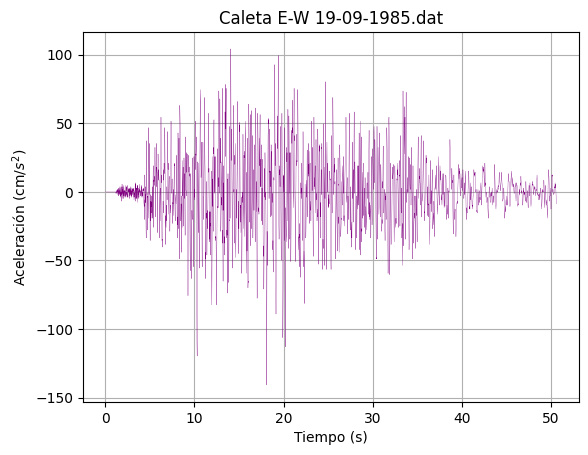

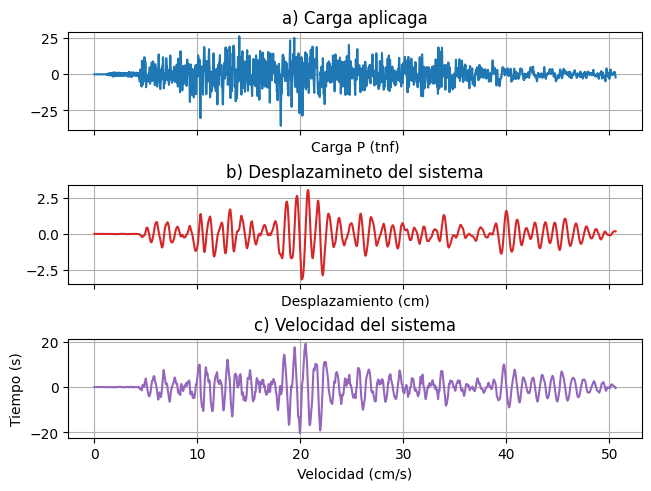

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

##########################
### LECTURA DE ARCHIVO ###
##########################

def leer_acelerograma(nom_archivo):
  dat_head = np.loadtxt(nom_archivo, 
                      skiprows=1, max_rows=1,).T          #--- Leer datos iniciales de acelerograma
  dt = dat_head[1]                                        #--- Intervalo de tiempo de acelerograma
  cD = int(dat_head[0])                                   #--- Cantidad de datos de acelerograma
  n = round(cD*dt,4)+dt                                   #--- Tiempo final (dt*cD)
  fac = 1                                                 #--- Factor de correción
  t = np.arange(dt,n,dt)                                  #--- Vactor de tiempo
  vec_ac = fac*np.loadtxt(nom_archivo, 
                          skiprows=2, usecols=(0)).T      #--- Factor de corrección * Vector de acelerograma
  ac = vec_ac
  return (t,vec_ac,nom_archivo,dt)

def graficar_acelerograma(t, ac, nom_archivo, color_graf):
  plt.plot(t, ac, linewidth = 0.2, color = color_graf)
  plt.xlabel('Tiempo (s)')
  plt.ylabel('Aceleración (cm/$s^2$)')
  plt.title(nom_archivo)
  plt.grid(True)
  return

def t_ac_nom(nom_archivo):
  color = random.choice(('blue','orange','green','red','purple','brown','pink','gray','olive','cyan'))
  archivo = leer_acelerograma(nom_archivo)
  t = archivo[0]
  ac = archivo[1]
  nom_arch = archivo[2]
  dt = archivo[3]
  color_graf = color
  grafica_ac = graficar_acelerograma(t,ac,nom_arch,color_graf)
  return (t, ac, nom_arch,dt)

lista_arch = ['Caleta E-W 19-09-1985.dat','Caleta S-N 19-09-1985.dat','Caleta VERT 19-09-1985.dat',
              'SCT1 E-W.dat','SCT1 N-S.dat','SCT1 Vert.dat',
              'SCT2-EW 19-09-2017.dat','SCT2-NS 19-09-2017.dat','SCT2-VERT 19-09-2017.dat']
Archivo_nomb = lista_arch[0]
archivo1 = t_ac_nom(Archivo_nomb)
t = archivo1[0]
ac = archivo1[1]
dt = archivo1[3]

##########################
### CALCULO DE RIGIDEZ ###
##########################

def dist2pts(x1,y1,x2,y2):
  L = ((x2-x1)**2+(y2-y1)**2)**(1/2)
  return(L)
def secc_W(A,d,tw,Iz):
  F_f = A/(d*tw)
  return(A, Iz, F_f)
def secc_OR(A,d,tw,Iz):
  F_f = A/(2*d*tw)
  return(A, Iz, F_f)
def secc_C(D):
  r = D/2
  A = np.pi()*r**2
  Iz = (1/4)*np.pi()*r**4
  F_f = 10/9
  return(A, Iz, F_f)
def secc_req(b,h):
  A = b*h
  Iz = (1/12)*b*h**3
  F_f = 1.2
  return(A, Iz, F_f)
def secc_HSS(b,h,tw):
  A = b*h-(b-2*tw)*(h-2*tw)
  Iz = (1/12)*b*h**3 - (1/12)*(b-2*tw)*(h-2*tw)**3
  F_f = (2*tw*b)/(A)
  return(A, Iz, F_f)

dist = dist2pts(0,0,0,4.5)

#########################
### DATOS DEL SISTEMA ###
#########################

xi = 0.02                   #----------- Fracción de amortiguamiento 1
xi = 0.05                   #----------- Fracción de amortiguamiento 2
dt = archivo1[3]            #----------- Incremento del tiempo
t = archivo1[0]             #----------- Vector del tiempo
              
m = 0.2533                  #----------- Masa
k = 10                      #----------- Rigidez
T = 1                       #----------- Periodo
w = 2*np.pi / T             #----------- Frecuencia
wd = w * (1-xi**2)**(1/2)   #----------- Frecuencia amortiguada

#############################
### PARAMETROS DE TRABAJO ###
#############################

n = int(len(t))             #----------- Número de datos

u = np.zeros(n)             #----------- Declarar arreglo de Desplazamientos
v = np.zeros(n)             #----------- Declarar arreglo de Velocidades
P = np.zeros(n)             #----------- Declarar arreglo de Fuerzas

u[0] = 0                    #----------- Colocar en en arreglo Deplazamiento inicial
v[0] = 0                    #----------- Colocar en el arreglo Velocidad inicial

P[0:n] = 0                  #----------- Inicializa con ceros carga P
u[1:n] = 0                  #----------- Inicializa con ceros Desplazamientos apartir del segundo valor
v[1:n] = 0                  #----------- Inicializa con ceros Velocidades apartir del segundo valor

######################
### CARGA APLICADA ###
######################

P = m*ac

#------- VARAIBLES -------#

A = np.exp(-xi*w*dt) * ((xi/((1-xi**2)**(1/2)))*np.sin(wd*dt)+np.cos(wd*dt))
B = np.exp(-xi*w*dt) * (np.sin(wd*dt)/wd)
C = ((2*xi/(w*dt))+np.exp(-xi*w*dt)*(((1-2*xi**2)/(wd*dt)-xi/((1-xi*w*dt)**(1/2)))*np.sin(wd*dt)-(1 + 2*xi/(w*dt)) *np.cos(wd*dt)))/k
D = (1 - 2 *xi/(w*dt) + np.exp(-xi*w*dt) *(((2*xi**2-1)/(wd*dt))*np.sin(wd*dt)+(2*xi/(w*dt))*np.cos(wd*dt)))/k

Ap = -np.exp(-xi*w*dt)*((w/((1-xi**2)**(1/2)))*np.sin(wd*dt))
Bp = np.exp(-xi*w*dt)*(np.cos(wd*dt)-(xi/((1-xi**2)**(1/2))*np.sin(wd*dt)))
Cp = (-1/dt + np.exp(-xi*w*dt)*((w/((1-xi**2)**(1/2))+xi/(dt*((1-xi**2)**(1/2))))* np.sin(wd*dt) + np.cos(wd*dt)/dt))/k
Dp = (1 - np.exp(-xi*w*dt)*((xi/((1-xi**2)**(1/2))*np.sin(wd*dt)+np.cos(wd*dt))))/(k*dt)

                 
for i in range(0,n-1):
    u[i+1] = A*u[i] + B*v[i] + C*P[i] + D*P[i+1]
    v[i+1] = Ap*u[i] + Bp*v[i] + Cp*P[i] + Dp*P[i+1]

###################################
############# Graficar ############
###################################

#--- IMPRESIÓN DE SOLUCIONES ---#

fig, axs = plt.subplots(3, sharex= True, constrained_layout=True, linewidth = .01) #--- Cantidad y formato de plots

axs[0].plot(t,P,'tab:blue')                                        #--- impresion 1er plot
axs[1].plot(t,u, 'tab:red')                                        #--- impresion 2do plot
axs[2].plot(t,v, 'tab:purple')                                     #--- impresion 3er plot U Total

#--- FORMATO DE PLOTS ---#

axs[0].set_title("a) Carga aplicaga")                           #--- Titulo de subplot
axs[0].grid(True)                                               #--- Activar grid
axs[0].set_xlabel('Carga P (tnf)')                              #--- Titulo de subplot eje X

axs[1].set_title("b) Desplazamineto del sistema")               #--- Titulo de subplot
axs[1].grid(True)                                               #--- Activar grid   
axs[1].set_xlabel('Desplazamiento (cm)')                        #--- Titulo de subplot eje X    

axs[2].set_title("c) Velocidad del sistema")                    #--- Titulo de subplot
axs[2].grid(True)                                               #--- Activar grid
axs[2].set_xlabel('Velocidad (cm/s)')                           #--- Titulo de subplot eje X
axs[2].set_ylabel('Tiempo (s)')                                 #--- Titulo de subplot eje Y

#--- TABLA DE DATOS ---#

tableDicc = pd.DataFrame(np.column_stack((t, P, A*u, B*v, C*P, D*P, u, v)),
                         columns=['ti(s)', 'Pi', 'A*(ui)', 'B*(vi)','C*Pi','D*Pi+1','ui(cm)','vi(cm/s)'])
tableDicc


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

##########################
### CALCULO DE RIGIDEZ ###
##########################

class calc_rigidez():
    
    def __init__(self,elemento, tipo_secc, material, Resistencia, 
                 Area_base_Diametro, altura, espesor, Inercia_z, 
                 coordenada_xi, coordenada_yi, coordenada_xf, coordenada_yf,
                 conx_inicial, conexion_final):
        self.elem = elemento
        self.secc = tipo_secc
        self.mat = material
        self.fpc = Resistencia
        self.AoboD = Area_base_Diametro
        self.hod = altura
        self.tw = espesor
        self.Iz = Inercia_z
        self.xi = coordenada_xi
        self.yi = coordenada_yi
        self.xf = coordenada_xf
        self.yf = coordenada_yf
        self.conx_i = conx_inicial
        self.conx_f = conexion_final
        
        self.L = self.Longitud()
        self.conex = self.Coneccion()
        self.vc = self.Vector_Coordenadas()
        self.prop_b = self.Prop_materiales()
        self.rig = self.k
        
    def __str__(self):
        print('Elemento:-------------- {} '.format(self.elem))
        print('Tipo de sección:------- {} '.format(self.secc))
        print('Material:-------------- {} '.format(self.mat))
        
        if self.mat == 'Concreto':
            print("Resistencia [f'c]:----- {} kg/cm2".format(self.fpc))
        elif self.mat == 'Acero':
            print("Resistencia [fy]:------ {} kg/cm2".format(self.fpc))
            
        print('Mod. Elasticidad:------ {} ton/cm2'.format(self.E))
        print('Mod. Puosson:---------- {}'.format(self.pois))
        
        if self.secc == 'secc_W':
            print('Area [A]:-------------- {} cm2'.format(self.AoboD))
            print('Altura [d]:------------ {} cm'.format(self.hod))
            print('Espesor [tw]:---------- {} cm'.format(self.tw))
        elif self.secc == 'secc_OR':
            print('Area [A]:-------------- {} cm2'.format(self.AoboD))
            print('Altura [d]:------------ {} cm'.format(self.hod))
            print('Espesor [tw]:---------- {} cm'.format(self.tw))
        elif self.secc == 'secc_C':
            print('Diametro [D]:---------- {} cm'.format(self.AoboD))
        elif self.secc == 'secc_rect':
            print('Base [b]:-------------- {} cm'.format(self.AoboD))
            print('Altura [d]:------------ {} cm'.format(self.hod))
        elif self.dicc == 'secc_HSS':
            print('Base [B]:-------------- {} cm'.format(self.AoboD))
            print('Altura [h]:------------ {} cm'.format(self.hod))
            print('Espesor [tw]:---------- {} cm'.format(self.tw))
        print('Inercia:--------------- {} cm'.format(self.Iz))
        print('Largo:----------------- {} cm'.format(self.L))
        print("Coordenadas iniciales:-({} , {})".format(self.xi, self.yi))
        print("Coordenadas finales:---({} , {})".format(self.xf, self.yf))
        print('Conxiones:-------------',self.conex)
        print('Area:------------------',self.A)
        print('Rigidez:---------------',self.k)
        return''
    
    def Longitud(self):
        return np.sqrt((self.xf - self.xi)**2 + (self.yf - self.yi)**2)
    def Coneccion(self):
        if self.conx_i == 'Articulado' and self.conx_f == 'Articulado':
            cnxe = 'A-A'
        elif self.conx_i == 'Empotrado' and self.conx_f == 'Empotrado':
            cnxe = 'E-E'
        elif self.conx_i == 'Articulado' and self.conx_f == 'Empotrado':
            cnxe = 'A-E'
        elif self.conx_i == 'Empotrado' and self.conx_f == 'Articualdo':
            cnxe = 'E-A'  
        return cnxe
    def Vector_Coordenadas (self):
        vc = []
        vc.append([self.xi, self.yi, self.xf, self.yf])
        return vc
    def Prop_materiales(self):
        if self.mat == 'Concreto':
            E = 14*((self.fpc)**(1/2))
            pois = 0.2
        elif self.mat == 'Acero':
            E = 2100
            pois = 0.3
        if self.secc == 'secc_W':
            A = self.AoboD
            d = self.hod
            tw = self.tw
            Iz = self.Iz
            F_f = A/(d*tw)
        elif self.secc == 'secc_OR':
            A = self.AoboD
            d = self.hod
            tw = self.tw
            Iz = self.Iz
            F_f = A/(2*d*tw)
        elif self.secc == 'secc_C':
            D = self.AoboD
            r = D/2
            A = np.pi*r**2
            Iz = (1/4)*np.pi*r**4
            F_f = 10/9
        elif self.secc == 'secc_rect':
            b = self.AoboD 
            h = self.hod 
            A = b*h
            Iz = (1/12)*b*h**3
            F_f = 1.2
        elif self.dicc == 'secc_HSS':
            b = self.AoboD
            h = self.hod
            tw = self.tw
            A = b*h-(b-2*tw)*(h-2*tw)
            Iz = (1/12)*b*h**3 - (1/12)*(b-2*tw)*(h-2*tw)**3
            F_f = (2*tw*b)/(A)

        L = self.L
        G = E/(2*(1+pois))
        phi = (12*F_f*E*Iz)/(G*A*L**2)
        self.A = A
        self.Iz = Iz
        self.G = G
        self.E = E
        self.pois = pois
        self.phi = phi
            
        if self.conex == 'E-E':
            self.k = (12*self.E*self.Iz)/(self.L**3*(1+self.phi))
        elif self.conex == 'E-A' or self.conex == 'A-E':
            self.k = (3*self.E*self.Iz)/(self.L**3*(1+(self.phi/4)))
        elif self.conex == 'A-A':
            self.k = (self.E*self.A)/(self.L)  
        return ''

class suma_rigideces():     
    nom_elemento = []
    rigidez = []
    caso_rigidez = []
    
    #--- BARRA 1 ---#
    barra1 = calc_rigidez('elemento 1', 'secc_rect', 'Concreto',250,50,65,0,0,0,0,0,450, 'Articulado', 'Empotrado')
    caso_K = 'Paralelo'
    caso_rigidez.append(caso_K)
    nom_elemento.append(barra1.elem)
    rigidez.append(barra1.rig)
    k1 = rigidez[0]
    
    #--- BARRA 2 ---#
    barra2 = calc_rigidez('elemento 2', 'secc_rect', 'Concreto',250,50,65,0,0,600,0,600,450, 'Articulado', 'Empotrado')    
    caso_K = 'Paralelo'
    caso_rigidez.append(caso_K)
    nom_elemento.append(barra2.elem)
    rigidez.append(barra2.rig)
    k2 = rigidez[1]

    #--- BARRA 3 ---#
    barra3 = calc_rigidez('elemento 3', 'secc_C', 'Acero',2530,2.54*3/4,0,0,0,
                          0,0,600,450, 'Articulado', 'Articulado')    
    caso_K = 'Serie'
    caso_rigidez.append(caso_K)
    nom_elemento.append(barra3.elem)
    rigidez.append(barra3.rig)
    k3 = rigidez[2]

    #--- BARRA 4 ---#
    barra4 = calc_rigidez('elemento 4', 'secc_C', 'Acero',2530,2.54*3/4,0,0,0,
                          0,450,600,0, 'Articulado', 'Articulado')    
    caso_K = 'Serie'
    caso_rigidez.append(caso_K)
    nom_elemento.append(barra4.elem)
    rigidez.append(barra4.rig)
    k4 = rigidez[3]
    
    #--- Casos de Rigidez ---3
    Res_Kt = []
    #- CASO 1 (P + P)-#
    K_t = k1 + k2
    Res_Kt.append(K_t)
    
    #- CASO 2 (P + S-P)-#
    K_t = k1 + k2 + k3
    Res_Kt.append(K_t)
    
    #- CASO 3 (S-P + S-P)-#
    K_t = k1 + k2 + k3 + k4	
    Res_Kt.append(K_t)
    
print(suma_rigideces.rigidez)
print(suma_rigideces.barra4)
print(suma_rigideces.Res_Kt)

    

[8.215519505835234, 8.215519505835234, 7.980642795785588, 7.980642795785588]
Elemento:-------------- elemento 4 
Tipo de sección:------- secc_C 
Material:-------------- Acero 
Resistencia [fy]:------ 2530 kg/cm2
Mod. Elasticidad:------ 2100 ton/cm2
Mod. Puosson:---------- 0.3
Diametro [D]:---------- 1.905 cm
Inercia:--------------- 0.6464721478119598 cm
Largo:----------------- 750.0 cm
Coordenadas iniciales:-(0 , 450)
Coordenadas finales:---(600 , 0)
Conxiones:------------- A-A
Area:------------------ 2.8502295699234246
Rigidez:--------------- 7.980642795785588

[16.431039011670467, 24.411681807456056, 32.39232460324165]


Elemento:-------------- elemento 1 
Tipo de sección:------- secc_rect 
Material:-------------- Concreto 
Resistencia [f'c]:----- 250 kg/cm2
Mod. Elasticidad:------ 221.35943621178654 ton/cm2
Mod. Puosson:---------- 0.2
Base [b]:-------------- 50 cm
Altura [d]:------------ 65 cm
Inercia:--------------- 1144270.8333333333 cm
Largo:----------------- 450.0 cm
Coordenadas iniciales:-(0 , 0)
Coordenadas finales:---(0 , 450)
Conxiones:------------- A-E
Area:------------------ 3250
Rigidez:--------------- 8.215519505835234

Elemento:-------------- elemento 2 
Tipo de sección:------- secc_rect 
Material:-------------- Concreto 
Resistencia [f'c]:----- 250 kg/cm2
Mod. Elasticidad:------ 221.35943621178654 ton/cm2
Mod. Puosson:---------- 0.2
Base [b]:-------------- 50 cm
Altura [d]:------------ 65 cm
Inercia:--------------- 1144270.8333333333 cm
Largo:----------------- 450.0 cm
Coordenadas iniciales:-(600 , 0)
Coordenadas finales:---(600 , 450)
Conxiones:------------- A-E
Area:------------------ 

,ti(s),Pi,A*(ui),B*(vi),C*Pi,D*Pi+1,ui(cm),vi(cm/s)
0,0.005,-0.177278,0.000000,0.000000,-0.000004,-0.000002,0.000000,0.000000
1,0.010,-0.177278,-0.000005,-0.000011,-0.000004,-0.000002,-0.000005,-0.002126
2,0.015,-0.177278,-0.000021,-0.000021,-0.000004,-0.000002,-0.000021,-0.004243
3,0.020,-0.177278,-0.000048,-0.000032,-0.000004,-0.000002,-0.000048,-0.006350
4,0.025,-0.177278,-0.000085,-0.000042,-0.000004,-0.000002,-0.000085,-0.008443
...,...,...,...,...,...,...,...,...
10116,50.585,-15.282273,1.429026,-0.007560,-0.000306,-0.000153,1.429730,-1.514681
10117,50.590,-21.349551,1.420245,-0.010036,-0.000428,-0.000214,1.420945,-2.010588
10118,50.595,-24.383191,1.408843,-0.012765,-0.000489,-0.000244,1.409538,-2.557526
10119,50.600,-27.385229,1.394627,-0.015655,-0.000549,-0.000274,1.395315,-3.136422


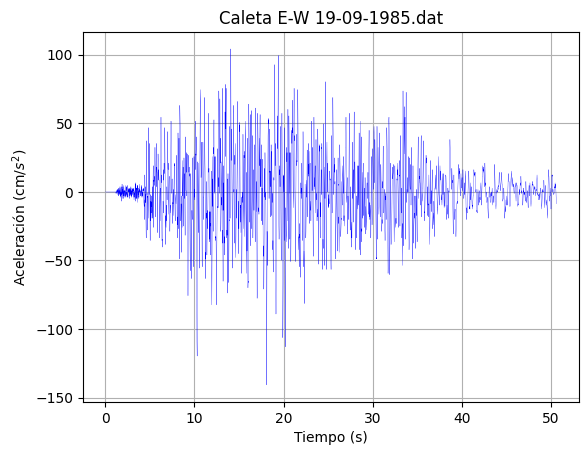

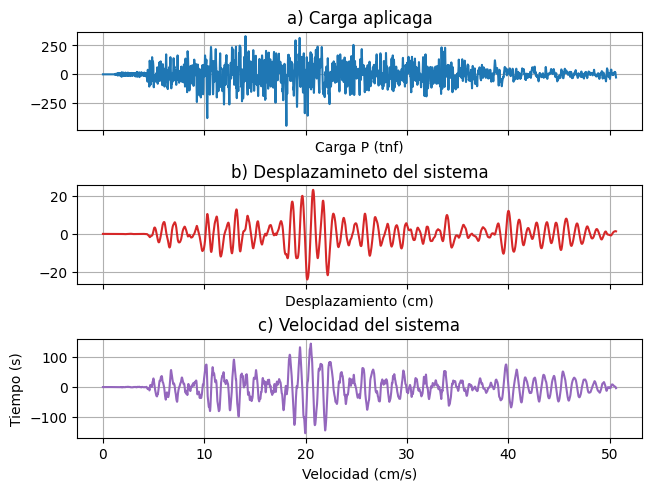

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

##########################
### CALCULO DE RIGIDEZ ###
##########################

class calc_rigidez():
    
    def __init__(self,elemento, tipo_secc, material, Resistencia, 
                 Area_base_Diametro, altura, espesor, Inercia_z, 
                 coordenada_xi, coordenada_yi, coordenada_xf, coordenada_yf,
                 conx_inicial, conexion_final):
        self.elem = elemento
        self.secc = tipo_secc
        self.mat = material
        self.fpc = Resistencia
        self.AoboD = Area_base_Diametro
        self.hod = altura
        self.tw = espesor
        self.Iz = Inercia_z
        self.xi = coordenada_xi
        self.yi = coordenada_yi
        self.xf = coordenada_xf
        self.yf = coordenada_yf
        self.conx_i = conx_inicial
        self.conx_f = conexion_final
        
        self.L = self.Longitud()
        self.conex = self.Coneccion()
        self.vc = self.Vector_Coordenadas()
        self.prop_b = self.Prop_materiales()
        self.rig = self.k
        
    def __str__(self):
        print('Elemento:-------------- {} '.format(self.elem))
        print('Tipo de sección:------- {} '.format(self.secc))
        print('Material:-------------- {} '.format(self.mat))
        
        if self.mat == 'Concreto':
            print("Resistencia [f'c]:----- {} kg/cm2".format(self.fpc))
        elif self.mat == 'Acero':
            print("Resistencia [fy]:------ {} kg/cm2".format(self.fpc))
            
        print('Mod. Elasticidad:------ {} ton/cm2'.format(self.E))
        print('Mod. Puosson:---------- {}'.format(self.pois))
        
        if self.secc == 'secc_W':
            print('Area [A]:-------------- {} cm2'.format(self.AoboD))
            print('Altura [d]:------------ {} cm'.format(self.hod))
            print('Espesor [tw]:---------- {} cm'.format(self.tw))
        elif self.secc == 'secc_OR':
            print('Area [A]:-------------- {} cm2'.format(self.AoboD))
            print('Altura [d]:------------ {} cm'.format(self.hod))
            print('Espesor [tw]:---------- {} cm'.format(self.tw))
        elif self.secc == 'secc_C':
            print('Diametro [D]:---------- {} cm'.format(self.AoboD))
        elif self.secc == 'secc_rect':
            print('Base [b]:-------------- {} cm'.format(self.AoboD))
            print('Altura [d]:------------ {} cm'.format(self.hod))
        elif self.dicc == 'secc_HSS':
            print('Base [B]:-------------- {} cm'.format(self.AoboD))
            print('Altura [h]:------------ {} cm'.format(self.hod))
            print('Espesor [tw]:---------- {} cm'.format(self.tw))
        print('Inercia:--------------- {} cm'.format(self.Iz))
        print('Largo:----------------- {} cm'.format(self.L))
        print("Coordenadas iniciales:-({} , {})".format(self.xi, self.yi))
        print("Coordenadas finales:---({} , {})".format(self.xf, self.yf))
        print('Conxiones:-------------',self.conex)
        print('Area:------------------',self.A)
        print('Rigidez:---------------',self.k)
        return''
    
    def Longitud(self):
        return np.sqrt((self.xf - self.xi)**2 + (self.yf - self.yi)**2)
    def Coneccion(self):
        if self.conx_i == 'Articulado' and self.conx_f == 'Articulado':
            cnxe = 'A-A'
        elif self.conx_i == 'Empotrado' and self.conx_f == 'Empotrado':
            cnxe = 'E-E'
        elif self.conx_i == 'Articulado' and self.conx_f == 'Empotrado':
            cnxe = 'A-E'
        elif self.conx_i == 'Empotrado' and self.conx_f == 'Articualdo':
            cnxe = 'E-A'  
        return cnxe
    def Vector_Coordenadas (self):
        vc = []
        vc.append([self.xi, self.yi, self.xf, self.yf])
        return vc
    def Prop_materiales(self):
        if self.mat == 'Concreto':
            E = 14*((self.fpc)**(1/2))
            pois = 0.2
        elif self.mat == 'Acero':
            E = 2100
            pois = 0.3
        if self.secc == 'secc_W':
            A = self.AoboD
            d = self.hod
            tw = self.tw
            Iz = self.Iz
            F_f = A/(d*tw)
        elif self.secc == 'secc_OR':
            A = self.AoboD
            d = self.hod
            tw = self.tw
            Iz = self.Iz
            F_f = A/(2*d*tw)
        elif self.secc == 'secc_C':
            D = self.AoboD
            r = D/2
            A = np.pi*r**2
            Iz = (1/4)*np.pi*r**4
            F_f = 10/9
        elif self.secc == 'secc_rect':
            b = self.AoboD 
            h = self.hod 
            A = b*h
            Iz = (1/12)*b*h**3
            F_f = 1.2
        elif self.dicc == 'secc_HSS':
            b = self.AoboD
            h = self.hod
            tw = self.tw
            A = b*h-(b-2*tw)*(h-2*tw)
            Iz = (1/12)*b*h**3 - (1/12)*(b-2*tw)*(h-2*tw)**3
            F_f = (2*tw*b)/(A)

        L = self.L
        G = E/(2*(1+pois))
        phi = (12*F_f*E*Iz)/(G*A*L**2)
        self.A = A
        self.Iz = Iz
        self.G = G
        self.E = E
        self.pois = pois
        self.phi = phi
            
        if self.conex == 'E-E':
            self.k = (12*self.E*self.Iz)/(self.L**3*(1+self.phi))
        elif self.conex == 'E-A' or self.conex == 'A-E':
            self.k = (3*self.E*self.Iz)/(self.L**3*(1+(self.phi/4)))
        elif self.conex == 'A-A':
            self.k = (self.E*self.A)/(self.L)  
        return ''

class suma_rigideces():     
    nom_elemento = []
    rigidez = []
    caso_rigidez = []
    
    #--- BARRA 1 ---#
    barra1 = calc_rigidez('elemento 1', 'secc_rect', 'Concreto',250,50,65,0,0,0,0,0,450, 'Articulado', 'Empotrado')
    caso_K = 'Paralelo'
    caso_rigidez.append(caso_K)
    nom_elemento.append(barra1.elem)
    rigidez.append(barra1.rig)
    k1 = rigidez[0]
    
    #--- BARRA 2 ---#
    barra2 = calc_rigidez('elemento 2', 'secc_rect', 'Concreto',250,50,65,0,0,600,0,600,450, 'Articulado', 'Empotrado')    
    caso_K = 'Paralelo'
    caso_rigidez.append(caso_K)
    nom_elemento.append(barra2.elem)
    rigidez.append(barra2.rig)
    k2 = rigidez[1]

    #--- BARRA 3 ---#
    barra3 = calc_rigidez('elemento 3', 'secc_C', 'Acero',2530,2.54*3/4,0,0,0,
                          0,0,600,450, 'Articulado', 'Articulado')    
    caso_K = 'Serie'
    caso_rigidez.append(caso_K)
    nom_elemento.append(barra3.elem)
    rigidez.append(barra3.rig)
    k3 = rigidez[2]

    #--- BARRA 4 ---#
    barra4 = calc_rigidez('elemento 4', 'secc_C', 'Acero',2530,2.54*3/4,0,0,0,
                          0,450,600,0, 'Articulado', 'Articulado')    
    caso_K = 'Serie'
    caso_rigidez.append(caso_K)
    nom_elemento.append(barra4.elem)
    rigidez.append(barra4.rig)
    k4 = rigidez[3]
    
    #--- Casos de Rigidez ---#
    Res_Kt = []
    
    #- CASO 1 (P + P)-#
    K_t = k1 + k2
    Res_Kt.append(K_t)
    
    #- CASO 2 (P + S-P)-#
    K_t = k1 + k2 + k3
    Res_Kt.append(K_t)
    
    #- CASO 3 (S-P + S-P)-#
    K_t = k1 + k2 + k3 + k4	
    Res_Kt.append(K_t)

print(suma_rigideces.barra1)
print(suma_rigideces.barra2)
print(suma_rigideces.barra3)
print(suma_rigideces.barra4)
print(suma_rigideces.Res_Kt)

##########################
### LECTURA DE ARCHIVO ###
##########################

def leer_acelerograma(nom_archivo):
  dat_head = np.loadtxt(nom_archivo, 
                      skiprows=1, max_rows=1,).T          #--- Leer datos iniciales de acelerograma
  dt = dat_head[1]                                        #--- Intervalo de tiempo de acelerograma
  cD = int(dat_head[0])                                   #--- Cantidad de datos de acelerograma
  n = round(cD*dt,4)+dt                                   #--- Tiempo final (dt*cD)
  fac = 1                                                 #--- Factor de correción
  t = np.arange(dt,n,dt)                                  #--- Vactor de tiempo
  vec_ac = fac*np.loadtxt(nom_archivo, 
                          skiprows=2, usecols=(0)).T      #--- Factor de corrección * Vector de acelerograma
  ac = vec_ac
  return (t,vec_ac,nom_archivo,dt)

def graficar_acelerograma(t, ac, nom_archivo, color_graf):
  plt.plot(t, ac, linewidth = 0.2, color = color_graf)
  plt.xlabel('Tiempo (s)')
  plt.ylabel('Aceleración (cm/$s^2$)')
  plt.title(nom_archivo)
  plt.grid(True)
  return

def t_ac_nom(nom_archivo):
  color = random.choice(('blue','orange','green','red','purple','brown','pink','gray','olive','cyan'))
  archivo = leer_acelerograma(nom_archivo)
  t = archivo[0]
  ac = archivo[1]
  nom_arch = archivo[2]
  dt = archivo[3]
  color_graf = color
  grafica_ac = graficar_acelerograma(t,ac,nom_arch,color_graf)
  return (t, ac, nom_arch,dt)

lista_arch = ['Caleta E-W 19-09-1985.dat','Caleta S-N 19-09-1985.dat','Caleta VERT 19-09-1985.dat',
              'SCT1 E-W.dat','SCT1 N-S.dat','SCT1 Vert.dat',
              'SCT2-EW 19-09-2017.dat','SCT2-NS 19-09-2017.dat','SCT2-VERT 19-09-2017.dat']
Archivo_nomb = lista_arch[0]
archivo1 = t_ac_nom(Archivo_nomb)
t = archivo1[0]
ac = archivo1[1]
dt = archivo1[3]


#########################
### DATOS DEL SISTEMA ###
#########################

#xi = 0.02                  #----------- Fracción de amortiguamiento 1
xi = 0.05                   #----------- Fracción de amortiguamiento 2
dt = archivo1[3]            #----------- Incremento del tiempo
t = archivo1[0]             #----------- Vector del tiempo
              
m = 31/9.81                 #----------- Masa
T = 1                       #----------- Periodo
w = 2*np.pi / T             #----------- Frecuencia
wd = w * (1-xi**2)**(1/2)   #----------- Frecuencia amortiguada

#############################
### PARAMETROS DE TRABAJO ###
#############################

k = suma_rigideces.Res_Kt[0]
n = int(len(t))             #----------- Número de datos

u = np.zeros(n)             #----------- Declarar arreglo de Desplazamientos
v = np.zeros(n)             #----------- Declarar arreglo de Velocidades
P = np.zeros(n)             #----------- Declarar arreglo de Fuerzas

u[0] = 0                    #----------- Colocar en en arreglo Deplazamiento inicial
v[0] = 0                    #----------- Colocar en el arreglo Velocidad inicial

P[0:n] = 0                  #----------- Inicializa con ceros carga P
u[1:n] = 0                  #----------- Inicializa con ceros Desplazamientos apartir del segundo valor
v[1:n] = 0                  #----------- Inicializa con ceros Velocidades apartir del segundo valor

######################
### CARGA APLICADA ###
######################

P = m*ac

#------- VARAIBLES -------#

A = np.exp(-xi*w*dt) * ((xi/((1-xi**2)**(1/2)))*np.sin(wd*dt)+np.cos(wd*dt))
B = np.exp(-xi*w*dt) * (np.sin(wd*dt)/wd)
C = ((2*xi/(w*dt))+np.exp(-xi*w*dt)*(((1-2*xi**2)/(wd*dt)-xi/((1-xi*w*dt)**(1/2)))*np.sin(wd*dt)-(1 + 2*xi/(w*dt)) *np.cos(wd*dt)))/k
D = (1 - 2 *xi/(w*dt) + np.exp(-xi*w*dt) *(((2*xi**2-1)/(wd*dt))*np.sin(wd*dt)+(2*xi/(w*dt))*np.cos(wd*dt)))/k

Ap = -np.exp(-xi*w*dt)*((w/((1-xi**2)**(1/2)))*np.sin(wd*dt))
Bp = np.exp(-xi*w*dt)*(np.cos(wd*dt)-(xi/((1-xi**2)**(1/2))*np.sin(wd*dt)))
Cp = (-1/dt + np.exp(-xi*w*dt)*((w/((1-xi**2)**(1/2))+xi/(dt*((1-xi**2)**(1/2))))* np.sin(wd*dt) + np.cos(wd*dt)/dt))/k
Dp = (1 - np.exp(-xi*w*dt)*((xi/((1-xi**2)**(1/2))*np.sin(wd*dt)+np.cos(wd*dt))))/(k*dt)

                 
for i in range(0,n-1):
    u[i+1] = A*u[i] + B*v[i] + C*P[i] + D*P[i+1]
    v[i+1] = Ap*u[i] + Bp*v[i] + Cp*P[i] + Dp*P[i+1]

###################################
############# Graficar ############
###################################

#--- IMPRESIÓN DE SOLUCIONES ---#

fig, axs = plt.subplots(3, sharex= True, constrained_layout=True, linewidth = .01) #--- Cantidad y formato de plots

axs[0].plot(t,P,'tab:blue')                                        #--- impresion 1er plot
axs[1].plot(t,u, 'tab:red')                                        #--- impresion 2do plot
axs[2].plot(t,v, 'tab:purple')                                     #--- impresion 3er plot U Total

#--- FORMATO DE PLOTS ---#

axs[0].set_title("a) Carga aplicaga")                           #--- Titulo de subplot
axs[0].grid(True)                                               #--- Activar grid
axs[0].set_xlabel('Carga P (tnf)')                              #--- Titulo de subplot eje X

axs[1].set_title("b) Desplazamineto del sistema")               #--- Titulo de subplot
axs[1].grid(True)                                               #--- Activar grid   
axs[1].set_xlabel('Desplazamiento (cm)')                        #--- Titulo de subplot eje X    

axs[2].set_title("c) Velocidad del sistema")                    #--- Titulo de subplot
axs[2].grid(True)                                               #--- Activar grid
axs[2].set_xlabel('Velocidad (cm/s)')                           #--- Titulo de subplot eje X
axs[2].set_ylabel('Tiempo (s)')                                 #--- Titulo de subplot eje Y

#--- TABLA DE DATOS ---#

tableDicc = pd.DataFrame(np.column_stack((t, P, A*u, B*v, C*P, D*P, u, v)),
                         columns=['ti(s)', 'Pi', 'A*(ui)', 'B*(vi)','C*Pi','D*Pi+1','ui(cm)','vi(cm/s)'])
tableDicc


In [5]:
import matplotlib

from pylatex import Document, Section, Figure, NoEscape

matplotlib.use('Agg')  # Not to use X server. For TravisCI.
import matplotlib.pyplot as plt  # noqa


def main(fname, width, *args, **kwargs):
    geometry_options = {"right": "2cm", "left": "2cm"}
    doc = Document(fname, geometry_options=geometry_options)

    doc.append('Introduction.')

    with doc.create(Section('I am a section')):
        doc.append('Take a look at this beautiful plot:')

        with doc.create(Figure(position='htbp')) as plot:
            plot.add_plot(width=NoEscape(width), *args, **kwargs)
            plot.add_caption('I am a caption.')

        doc.append('Created using matplotlib.')

    doc.append('Conclusion.')

    doc.generate_pdf(clean_tex=False)


if __name__ == '__main__':

    #--- IMPRESIÓN DE SOLUCIONES ---#

    fig, axs = plt.subplots(3, sharex= True, constrained_layout=True, linewidth = .01) #--- Cantidad y formato de plots

    axs[0].plot(t,P,'tab:blue')                                        #--- impresion 1er plot
    axs[1].plot(t,u, 'tab:red')                                        #--- impresion 2do plot
    axs[2].plot(t,v, 'tab:purple')                                     #--- impresion 3er plot U Total

    #--- FORMATO DE PLOTS ---#

    axs[0].set_title("a) Carga aplicaga")                           #--- Titulo de subplot
    axs[0].grid(True)                                               #--- Activar grid
    axs[0].set_xlabel('Carga P (tnf)')                              #--- Titulo de subplot eje X

    axs[1].set_title("b) Desplazamineto del sistema")               #--- Titulo de subplot
    axs[1].grid(True)                                               #--- Activar grid   
    axs[1].set_xlabel('Desplazamiento (cm)')                        #--- Titulo de subplot eje X    

    axs[2].set_title("c) Velocidad del sistema")                    #--- Titulo de subplot
    axs[2].grid(True)                                               #--- Activar grid
    axs[2].set_xlabel('Velocidad (cm/s)')                           #--- Titulo de subplot eje X
    axs[2].set_ylabel('Tiempo (s)')                                 #--- Titulo de subplot eje Y

    main('matplotlib_ex-dpi', r'1\textwidth', dpi=300)

In [6]:
###############
### PYLATEX ###
###############